In [ ]:
from google.colab import files

uploaded = files.upload()

Saving credit_record.csv to credit_record.csv


In [ ]:
import pandas as pd

credit = pd.read_csv('credit_record.csv')

In [ ]:
from google.colab import files

uploaded = files.upload() #upload application csv

Saving application_record.csv to application_record.csv


In [ ]:
import pandas as pd

application = pd.read_csv('application_record.csv', sep = ',')
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
# select columns needed for prediction
df = pd.merge(application, credit)
df = df[['STATUS', 'ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']]
df.drop_duplicates(subset=['ID'], keep= False, inplace=True)

<ipython-input-5-212aa36c1943>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['ID'], keep= False, inplace=True)


In [ ]:
# separate data into features (X) and labels (y)
y = df['STATUS'] #this is the label

In [ ]:
X = df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']] #these are the features
features = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH']
X

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH
793,Y,Y,112500.0,-20502
2023,N,Y,297000.0,-15519
2139,N,Y,135000.0,-15484
3705,Y,Y,112500.0,-7489
23096,N,Y,90000.0,-8824
...,...,...,...,...
759216,N,Y,405000.0,-16367
760276,N,Y,180000.0,-10572
762120,N,Y,270000.0,-9177
766846,Y,Y,90000.0,-19084


In [ ]:
# change qualitative data to numerical values
X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})
X

<ipython-input-8-88399109af6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
<ipython-input-8-88399109af6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})


,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH
793,1,1,112500.0,-20502
2023,0,1,297000.0,-15519
2139,0,1,135000.0,-15484
3705,1,1,112500.0,-7489
23096,0,1,90000.0,-8824
...,...,...,...,...
759216,0,1,405000.0,-16367
760276,0,1,180000.0,-10572
762120,0,1,270000.0,-9177
766846,1,1,90000.0,-19084


Decision Tree

In [ ]:
# split training and testing data
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=110)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 110, max_depth = 3, min_samples_leaf = 8)
#we chose this random state, max_depth, and min_samples_leaf to avoid overfitting the data
dtree.fit(data_train, label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       random_state=110)

[Text(0.5, 0.875, 'AMT_INCOME_TOTAL <= 175050.0\nentropy = 1.075\nsamples = 272\nvalue = [181, 9, 82]'),
 Text(0.25, 0.625, 'DAYS_BIRTH <= -17809.5\nentropy = 1.048\nsamples = 170\nvalue = [108, 3, 59]'),
 Text(0.125, 0.375, 'DAYS_BIRTH <= -20444.5\nentropy = 1.104\nsamples = 62\nvalue = [42, 3, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.822\nsamples = 35\nvalue = [26, 0, 9]'),
 Text(0.1875, 0.125, 'entropy = 1.32\nsamples = 27\nvalue = [16, 3, 8]'),
 Text(0.375, 0.375, 'DAYS_BIRTH <= -14871.5\nentropy = 0.964\nsamples = 108\nvalue = [66, 0, 42]'),
 Text(0.3125, 0.125, 'entropy = 0.863\nsamples = 14\nvalue = [4, 0, 10]'),
 Text(0.4375, 0.125, 'entropy = 0.925\nsamples = 94\nvalue = [62, 0, 32]'),
 Text(0.75, 0.625, 'FLAG_OWN_REALTY <= 0.5\nentropy = 1.07\nsamples = 102\nvalue = [73, 6, 23]'),
 Text(0.625, 0.375, 'DAYS_BIRTH <= -17758.5\nentropy = 0.931\nsamples = 26\nvalue = [17, 0, 9]'),
 Text(0.5625, 0.125, 'entropy = 0.954\nsamples = 8\nvalue = [3, 0, 5]'),
 Text(0.6875, 0.125, 'entro

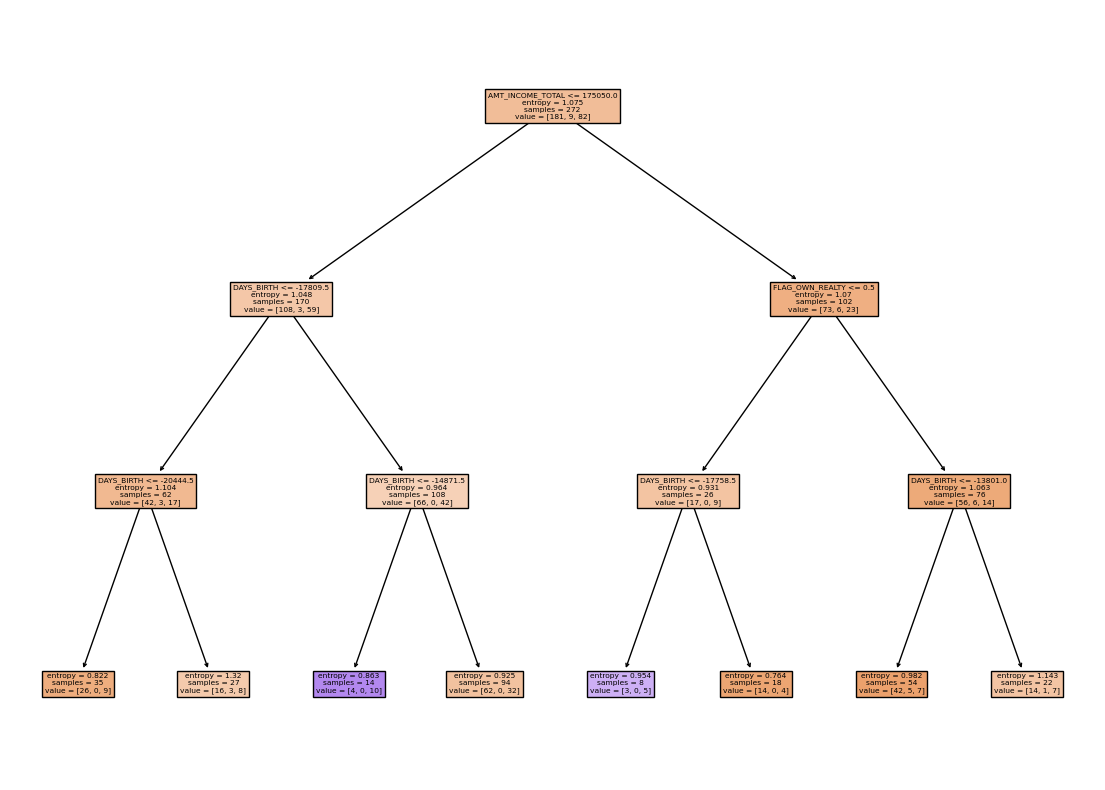

In [ ]:
# print out decison tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(14,10))
tree.plot_tree(dtree, feature_names=features, filled=True)

K-Nearest Neighbors

In [ ]:
def min_max_scaling(col):
  return (col - col.min()) / (col.max() - col.min())

# normalize numerical columns
X['AMT_INCOME_TOTAL'] = min_max_scaling(X['AMT_INCOME_TOTAL'])
X['DAYS_BIRTH'] = min_max_scaling(X['DAYS_BIRTH'])

<ipython-input-11-45b3c8176b1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AMT_INCOME_TOTAL'] = min_max_scaling(X['AMT_INCOME_TOTAL'])
<ipython-input-11-45b3c8176b1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DAYS_BIRTH'] = min_max_scaling(X['DAYS_BIRTH'])


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

#feature: FLAG_OWN_CAR
X_car = X['FLAG_OWN_CAR'].values.reshape(-1, 1)
data_train, data_test, label_train, label_test = train_test_split(X_car, y, test_size=0.2, random_state=110)
nbrs = KNeighborsClassifier(n_neighbors=2).fit(data_train, label_train)
nbrs.score(data_test, label_test)

0.6521739130434783

In [ ]:
#feature: FLAG_OWN_REALTY
X_realty = X['FLAG_OWN_REALTY'].values.reshape(-1, 1)
data_train, data_test, label_train, label_test = train_test_split(X_realty, y, test_size=0.2, random_state=110)
nbrs = KNeighborsClassifier(n_neighbors=2).fit(data_train, label_train)
nbrs.score(data_test, label_test)

0.6521739130434783

In [ ]:
#feature: AMT_INCOME_TOTAL
X_income = X['AMT_INCOME_TOTAL'].values.reshape(-1, 1)
data_train, data_test, label_train, label_test = train_test_split(X_income, y, test_size=0.2, random_state=110)
nbrs = KNeighborsClassifier(n_neighbors=2).fit(data_train, label_train)
nbrs.score(data_test, label_test)

0.5942028985507246

In [ ]:
#feature: DAYS_BIRTH
X_age = X['DAYS_BIRTH'].values.reshape(-1, 1)
data_train, data_test, label_train, label_test = train_test_split(X_age, y, test_size=0.2, random_state=110)
nbrs = KNeighborsClassifier(n_neighbors=2).fit(data_train, label_train)
nbrs.score(data_test, label_test)

0.6231884057971014

In [ ]:
#all features/ran it on the whole dataset
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=110)
nbrs = KNeighborsClassifier(n_neighbors=2).fit(data_train, label_train) #select the number for k.
#we chose k = 2 because we tested different values of k (shown below), and k = 2 had one of the highest scores
nbrs

KNeighborsClassifier(n_neighbors=2)

In [ ]:
nbrs.score(data_test, label_test)

0.6376811594202898

In [ ]:
scores = []

for i in range(10):
    data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=i)
    nbrs = KNeighborsClassifier(n_neighbors=2).fit(data_train, label_train)
    score = nbrs.score(data_test, label_test)
    scores.append(score)

scores

# we created a for loop that tests multiple values of k just to see what they would be and what values would lead to overfitting.

[0.6376811594202898,
 0.6376811594202898,
 0.6231884057971014,
 0.5942028985507246,
 0.6376811594202898,
 0.6521739130434783,
 0.5942028985507246,
 0.6086956521739131,
 0.5652173913043478,
 0.5652173913043478]